In [1]:
%load_ext autoreload
%autoreload 2

#import all required modules
from detection.core import DLModel
from modules.xstream import Stream
from modules.xpolygon import XPolygon
from modules.xutils import Config, add_polygon
from modules.xenum import StreamType, ModelType, PolygonType

In [2]:
#global vars
config = Config()
config.cam_windows_size = (1280, 720)
config.show_windows_size = (1280, 720)

In [3]:
#define stream object
stream = Stream(stream_type = StreamType.file, config = config)
stream.set_file_location('./assets/videos/vid001.mp4')
cap = stream.get_cap()

[msg]: target video file was set.
[msg]: loading cv2 capture object.
[msg]: capture object loading completed.


In [4]:
polygon = XPolygon(cap=cap, 
                   polygon_type=PolygonType.line, 
                   show_windows_size=config.show_windows_size)
polygons_list = polygon.draw()

[msg]: extract first frame for drawing polygon shape.
[msg]: drawing risk area as polygon shape.


In [ ]:
# polygons_list=[[(928, 218), (737, 190), (435, 155), (195, 143), (30, 315), (373, 350), (740, 396), (903, 427), (929, 219)]]

In [5]:
dlmodel = DLModel(model_type=ModelType.yolov8l, 
                  stream=stream, 
                  config=config)
dlmodel.set_risk_area(polygons_list)
dlmodel.detect(extract=True, save_file=False)

[msg]: polygon: POLYGON ((182 141, 386 148, 766 192, 938 215, 888 424, 435 386, 142 337, 24 309, 180 140, 182 141))
[msg]: loading yolo model from .pt file.
[msg]: yolo model loaded successfully.


In [5]:
import cv2
import matplotlib.pyplot as plt

In [26]:
turn_off_img = cv2.imread('./assets/images/light_turn_on.jpg')
turn_off_img = cv2.resize(turn_off_img, (400, 1197))
pred = cv2.imread('./assets/images/img1.jpg')

In [27]:
print(pred.shape)
print(turn_off_img.shape)

(1197, 1200, 3)
(1197, 400, 3)


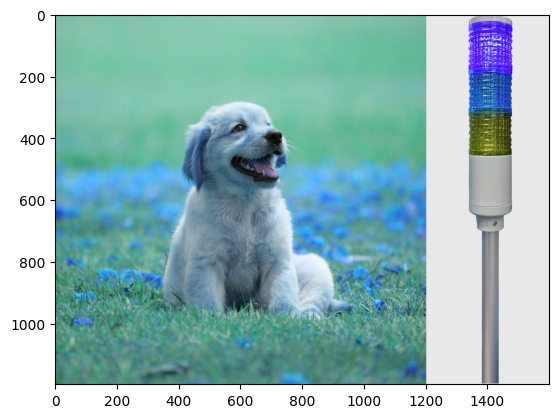

In [28]:
merge = cv2.hconcat([pred, turn_off_img])
plt.imshow(merge)